In [11]:
import pandas as pd 
import numpy as np 

result_df  = pd.read_pickle("data/df_plots.pkl")

In [12]:
plots_df = {"power_opt": result_df["pump4_power_opt"].resample("30S").median(),
            "power_old": result_df["pump1_power"].resample("30S").median(), 
            
            "speed_opt": result_df["pump4_rpm_opt"].resample("30S").median(), 
            "speed_old": result_df["pump1_rpm"].resample("30S").median(), 
                                                                       
            "outflow_opt": result_df["outflow_opt"].resample("30S").median(),   
            "outflow_old": result_df["outflow"].resample("30S").median(), 
            
            "height_opt": result_df["height_opt"].resample("30S").median(),   
            "height_old": result_df["height"].resample("30S").median()
            }
plots_df = pd.DataFrame(plots_df)
plots_df = plots_df.reset_index()

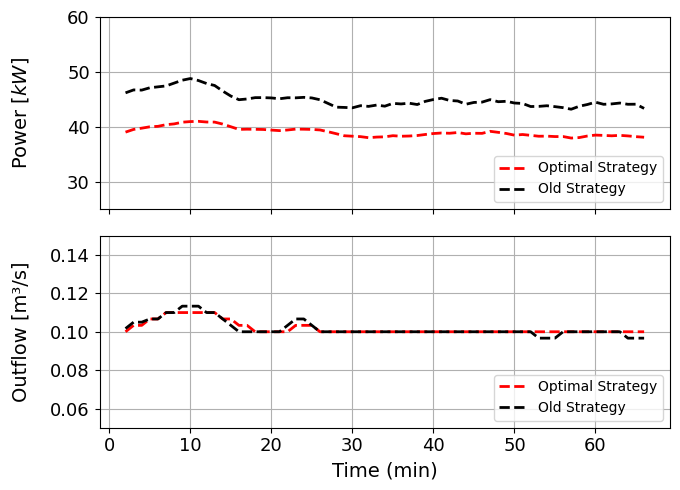

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.autolayout"] = False

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 5))

# First plot
ax[0].plot(plots_df.index, plots_df['power_opt'].rolling(3).mean(), color='red', linewidth=2, label='Optimal Strategy', linestyle= "dashed")
ax[0].plot(plots_df.index, plots_df['power_old'].rolling(3).mean(), color='black', linewidth=2, label='Old Strategy', linestyle= "dashed")
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Power $[kW]$',fontsize=14, labelpad=26)
ax[0].legend(loc='lower right', fontsize=10)
ax[0].set_ylim(25,60)
ax[0].grid()

# Second plot
ax[1].plot(plots_df.index, plots_df['outflow_opt'].rolling(3).mean(), color='red', linewidth=2, label='Optimal Strategy',linestyle= "dashed")
ax[1].plot(plots_df.index, plots_df['outflow_old'].rolling(3).mean(), color='black', linewidth=2, label='Old Strategy', linestyle= "dashed")
ax[1].set_ylabel('Outflow [m³/s]',fontsize=14, labelpad=14)
ax[1].legend(loc='lower right', fontsize=10)
ax[1].set_xlabel('Time (min)',fontsize=14)
ax[1].set_ylim(0.05,0.15)
ax[1].grid()

fig.tight_layout()
plt.savefig('img/opt_run.svg', format='svg' ,dpi=300, bbox_inches='tight')  # Save the plot to a single file
plt.show()


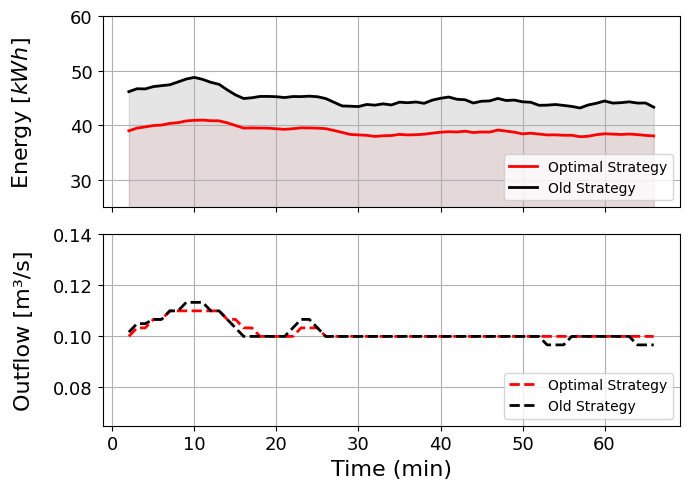

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 5))

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# First plot
ax[0].plot(plots_df.index, plots_df['power_opt'].rolling(3).mean(), color='red', linewidth=2, label='Optimal Strategy')
ax[0].plot(plots_df.index, plots_df['power_old'].rolling(3).mean(), color='black', linewidth=2, label='Old Strategy')
ax[0].fill_between(plots_df.index, plots_df['power_opt'].rolling(3).mean(), color='#FF7F7F', alpha=0.1)  # Fills the area under the curve with light color and opacity
ax[0].fill_between(plots_df.index, plots_df['power_old'].rolling(3).mean(), color='black', alpha=0.1)  # Fills the area under the curve with light color and opacity
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Energy $[kWh]$',fontsize=16, labelpad=26)
ax[0].legend(loc='lower right', fontsize=10)
ax[0].set_ylim(25,60)
ax[0].grid()

# Second plot
ax[1].plot(plots_df.index, plots_df['outflow_opt'].rolling(3).mean(), color='red', linewidth=2,linestyle="dashed", label='Optimal Strategy')
ax[1].plot(plots_df.index, plots_df['outflow_old'].rolling(3).mean(), color='black', linewidth=2,linestyle="dashed", label='Old Strategy')
#ax[1].fill_between(plots_df.index, plots_df['outflow_opt'].rolling(3).mean(), color='#FF7F7F', alpha=0.1)  # Fills the area under the curve with light color and opacity
#ax[1].fill_between(plots_df.index, plots_df['outflow_old'].rolling(3).mean(), color='black', alpha=0.1)  # Fills the area under the curve with light color and opacity
ax[1].set_ylabel('Outflow [m³/s]',fontsize=16, labelpad=14)
ax[1].legend(loc='lower right', fontsize=10)
ax[1].set_xlabel('Time (min)',fontsize=16)
ax[1].set_ylim(0.065,0.14)
ax[1].grid()

fig.tight_layout()
plt.savefig('img/opt_run.svg', format='svg' ,dpi=300, bbox_inches='tight')  # Save the plot to a single file
plt.show()


# BoxPlot

In [15]:
eff_two_pumps = [4.70538544072879,
 2.8276775083403565,
 6.384352800959967,
 3.1067044266481703,
 4.663091913066277,
 1.9565398033175734,
 9.262490597240518,
 5.105174662773158,
 2.065205301798107,
 6.354169599581784,
 6.219858117464256,
 5.324888945161478,
 3.9958797145665885,
 1.55766956004608,
 1.5781784860792618,
 5.320324869446496,
 5.305457951020372,
 6.568658339142123]

In [16]:
p1_only = [3.272618774148075,
 0.4331473316439784,
 5.995219320866413,
 1.4206846666292363,
 -0.5338192971927943,
 -2.747279219223121,
 17.062998285782413,
 1.4768710686400561,
 2.540180932517274,
 3.3858181273860257,
 2.4707177045798785,
 1.113663527294415,
 1.5095685184411864,
 -1.1097568456523181,
 -0.5371195942084177,
 12.738448149115978,
 13.841246659337944,
 1.6563403018851959,
 7.226849853985808]

In [17]:
p4_only = [-3.1309381721207132,
 2.3074558571450448,
 0.9386399150726751,
 -0.7295056255744657,
 3.636075838388088,
 3.4931193311315325,
 1.3512451063641948,
 -2.9560862734538134,
 -4.022416143617783,
 -1.593639413612677,
 -1.3398108013298322,
 9.881315288315653,
 3.741929358948036,
 8.437571098335265,
 0.2501090995174949,
 -2.584550988101739,
 -2.349628283445792,
 -3.8993987670320225]

In [18]:
efficiency = np.concatenate([p1_only, p4_only, eff_two_pumps])

In [19]:
efficiency_df = {"classes": len(p1_only)*["Pump1"] + len(p4_only)*["Pump4"] + len(eff_two_pumps)*["Pump1 and Pum4"], 
 "values": efficiency}


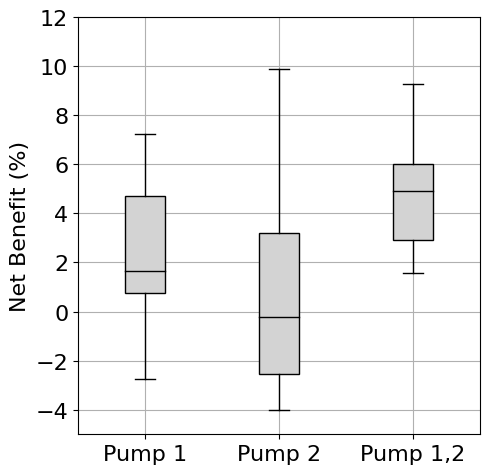

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# First, create your DataFrame
efficiency_df = pd.DataFrame({
    "classes": len(p1_only)*["Pump 1"] + len(p4_only)*["Pump 2"] + len(eff_two_pumps)*["Pump 1,2"], 
    "values": efficiency
})

# Convert the classes to a categorical type and specify the order
efficiency_df["classes"] = pd.Categorical(efficiency_df["classes"], categories=["Pump 1", "Pump 2", "Pump 1,2"], ordered=True)

# Then, create a boxplot for each class of pump
fig, ax = plt.subplots(figsize=(5, 5))

efficiency_df.boxplot(column='values', by='classes', ax=ax, patch_artist=True,
                      boxprops=dict(facecolor='lightgrey', color='black'),
                      medianprops=dict(color='black'),
                      whiskerprops=dict(color='black'),
                      capprops=dict(color='black'),
                      flierprops=dict(color='black', markeredgecolor='black'))

ax.set_title('')  # Remove automatically generated title
ax.set_xlabel('')  # Remove automatically generated x-label
plt.suptitle('')  # Remove automatically generated suptitle
ax.set_ylabel('Net Benefit (%)', fontsize=16)
ax.set_ylim(-5, 12)
ax.xaxis.grid(True)
plt.xticks(fontsize=16)  # Increase x-ticks font size
plt.yticks(fontsize=16)  # Increase y-ticks font size
plt.tight_layout()
plt.savefig('img/boxplot.pdf', format='pdf', dpi=300)
plt.savefig('img/boxplot.svg', format='svg', dpi=300)
plt.show()
